<a href="https://colab.research.google.com/github/mopfun/Project_4_Grp_1/blob/MI/Netflix_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question: Can we predict whether a movie will make it into Netflix's Top 10?

### refrences:
Kaggle notebooks

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd

# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Import Seaborn for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Check where this is file is stored
import os
os.getcwd()

'/content'

# Make sure you upload final_data.csv to the **content folder** in google colab every time you run this file

**Column Definitions:**
- **Rating:** Avgerage IMDb user rating on a scale of 1 to 10
- **Votes:** Total number of user votes that contributed to the IMDB rating
- **Meta Score:** Metacritic score based on critic reviews, ranging from 0-100
- **PR Rating:** Aged based rating PG, PG-13, R
- **Duration:** Total runtime of the movie
- **Netflix top 10:** Indicates if the movie made it into Netflix's top 10 list (1=Yes, 0=No)

In [24]:
# Import in csv file
df = pd.read_csv("final_data.csv")
df.head()

,row_id,movie_name,rating,votes,meta_score,genre0,genre1,genre2,genre3,pr_rating,...,cast0,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views
0,0,Leave the World Behind,6.5,90000.0,67,"Drama, Mystery, Thriller",Drama,Mystery,Thriller,R,...,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,41700000.0
1,16,Family Switch,5.6,16000.0,37,"Comedy, Family",Comedy,Family,NaN,PG,...,"Jennifer Garner, Ed Helms, Emma Myers, Brady Noon",Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,22200000.0
2,19,How the Grinch Stole Christmas,6.3,280000.0,46,"Comedy, Family, Fantasy",Comedy,Family,Fantasy,PG,...,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tambor",Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,NaN
3,23,Leo,7.0,21000.0,65,"Animation, Comedy, Family",Animation,Comedy,Family,PG,...,"Adam Sandler, Bill Burr, Cecily Strong, Jason ...",Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,34600000.0
4,27,Chicken Run: Dawn of the Nugget,6.5,6300.0,63,"Animation, Adventure, Comedy",Animation,Adventure,Comedy,PG,...,"Thandiwe Newton, Zachary Levi, Bella Ramsey, I...",Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,11900000.0


In [25]:
# Overview data types, non-nulls values, columns and row
# weekly_hours_viewed and weekly_views are missing a lot of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row_id               1734 non-null   int64  
 1   movie_name           1734 non-null   object 
 2   rating               1728 non-null   float64
 3   votes                1728 non-null   float64
 4   meta_score           1734 non-null   int64  
 5   genre0               1734 non-null   object 
 6   genre1               1734 non-null   object 
 7   genre2               1608 non-null   object 
 8   genre3               1219 non-null   object 
 9   pr_rating            1734 non-null   object 
 10  year                 1734 non-null   int64  
 11  duration             1734 non-null   float64
 12  cast0                1734 non-null   object 
 13  cast1                1734 non-null   object 
 14  cast2                1733 non-null   object 
 15  cast3                1733 non-null   o

In [26]:
# Determine the number of unique values in each column.
df.nunique()

,0
row_id,1734
movie_name,1704
rating,58
votes,673
meta_score,85
genre0,236
genre1,15
genre2,19
genre3,18
pr_rating,6


In [27]:
# Check the statistical summary of the numerical data
df.describe()

,row_id,rating,votes,meta_score,year,duration,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views
count,1734.000000,1728.000000,1.728000e+03,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1.750000e+02,4.800000e+01
mean,974.822376,6.952604,2.975975e+05,62.046713,2007.115917,1.952813,3.281430,0.100923,1.601434e+07,9.135417e+06
std,559.166408,0.854542,3.202216e+05,16.431277,14.080014,0.356897,0.817672,0.301313,2.112887e+07,9.090666e+06
min,0.000000,2.400000,1.070000e+02,14.000000,1939.000000,1.150000,1.000000,0.000000,2.740000e+06,2.400000e+06
25%,492.250000,6.400000,9.400000e+04,50.250000,1999.000000,1.700000,3.000000,0.000000,6.545000e+06,3.575000e+06
50%,975.500000,7.000000,2.030000e+05,63.000000,2010.000000,1.900000,3.000000,0.000000,9.030000e+06,5.550000e+06
75%,1452.750000,7.600000,3.830000e+05,74.000000,2019.000000,2.150000,4.000000,0.000000,1.349000e+07,1.200000e+07
max,1949.000000,9.300000,2.800000e+06,100.000000,2023.000000,4.100000,6.000000,1.000000,1.487200e+08,4.170000e+07


In [28]:
# Check for missing values
df.isna().sum()

,0
row_id,0
movie_name,0
rating,6
votes,6
meta_score,0
genre0,0
genre1,0
genre2,126
genre3,515
pr_rating,0


In [29]:
# Drop rows missing both rating and votes
df = df.dropna(subset=['rating', 'votes']).copy()

# Fill missing cast name with 'Unknown'
df[['cast2', 'cast3', 'cast4']] = df[['cast2', 'cast3', 'cast4']].fillna('Unknown')

# Fill weekly_hours_viewed with 0 if not in Top 10
df['weekly_hours_viewed'] = df['weekly_hours_viewed'].fillna(0)

In [30]:
# Change the string of genres into a list
df['all_genres'] = df['genre0'].str.split(', ')
df['all_genres']

,all_genres
0,"[Drama, Mystery, Thriller]"
1,"[Comedy, Family]"
2,"[Comedy, Family, Fantasy]"
3,"[Animation, Comedy, Family]"
4,"[Animation, Adventure, Comedy]"
...,...
1729,"[Action, Adventure, Sci-Fi]"
1730,"[Drama, Musical, Romance]"
1731,"[Comedy, Drama, Romance]"
1732,"[Drama, Horror, Sci-Fi]"


In [31]:
# ReCheck for missing values
df.isna().sum()

,0
row_id,0
movie_name,0
rating,0
votes,0
meta_score,0
genre0,0
genre1,0
genre2,126
genre3,513
pr_rating,0


####We need to decide which features to drop that won't be helpful for the models. One of the tougher calls was `weekly_views`. We feel it's an important feature, but it has 1680 null values. If needed, we can try filling the nulls with 0 instead of dropping the column entirely, just to see if it helps improve the model.

In [32]:
# Drop columns
df = df.drop(columns=["row_id", "movie_name", "genre0", "genre1", "genre2",	"genre3", "pr_rating", "cast0", "weekly_views"])

In [33]:
df.head()

,rating,votes,meta_score,year,duration,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,all_genres
0,6.5,90000.0,67,2023,2.300,Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,"[Drama, Mystery, Thriller]"
1,5.6,16000.0,37,2023,1.767,Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,"[Comedy, Family]"
2,6.3,280000.0,46,2000,1.733,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,"[Comedy, Family, Fantasy]"
3,7.0,21000.0,65,2023,1.700,Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,"[Animation, Comedy, Family]"
4,6.5,6300.0,63,2023,1.683,Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,"[Animation, Adventure, Comedy]"


### Investigate Votes Feature

<Axes: xlabel='votes'>

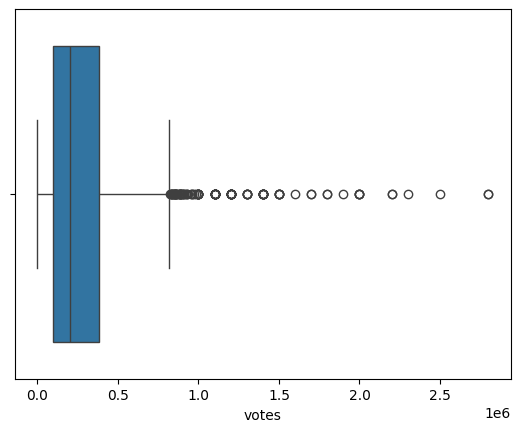

In [34]:
# Create boxplot to visual distribution of votes
sns.boxplot(x=df['votes'])


<Axes: xlabel='votes', ylabel='Count'>

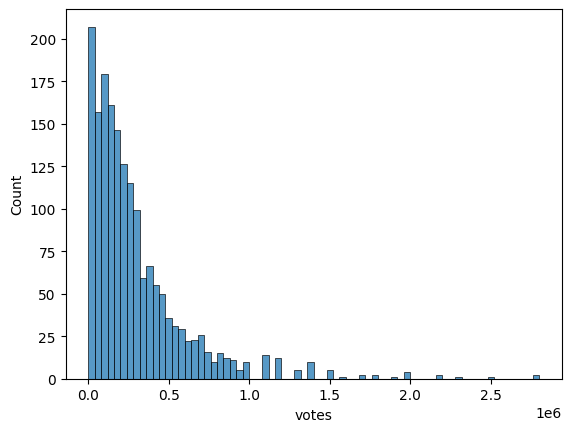

In [35]:
# Create a histogram to better visualize the distribution of votes
sns.histplot(df['votes'], bins=70)


As you can see, the distribution is right-skewed, which means most of the movies have a low number of votes, and a small number have very high vote counts. We tested different bin sizes, starting at 20 and increasing by 10 up to 70, to see how the shape of the histogram changed. We ended up using 70 bins because it gave us a better view of the outliers without losing the overall picture.

We thought about removing the outliers, but decided to keep them since they likely represent the most popular or well-known movies and could be important for our model. Instead of dropping them, we log transformed the votes column. This helps compress the range, reduce the impact of extreme values, and makes the data easier for the model to interpret.

In [36]:
#Check to see if there are any 0 in our
zero_count = (df['votes']==0).sum()
zero_count

np.int64(0)

In [37]:
# Perform log transform on votes
df['log_votes'] = np.log(df['votes'])
df['log_votes']

,log_votes
0,11.407565
1,9.680344
2,12.542545
3,9.952278
4,8.748305
...,...
1729,12.700769
1730,9.998798
1731,12.055250
1732,12.196022


In [38]:
# Drop Votes column
df = df.drop(columns='votes')

In [41]:
df.head()

,rating,meta_score,year,duration,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,all_genres,log_votes
0,6.5,67,2023,2.300,Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,"[Drama, Mystery, Thriller]",11.407565
1,5.6,37,2023,1.767,Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,"[Comedy, Family]",9.680344
2,6.3,46,2000,1.733,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,"[Comedy, Family, Fantasy]",12.542545
3,7.0,65,2023,1.700,Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,"[Animation, Comedy, Family]",9.952278
4,6.5,63,2023,1.683,Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,"[Animation, Adventure, Comedy]",8.748305


### Year Feature Conversion

In [43]:
# Convert Year to Movie Age
df['movie_age'] = 2025 - df['year']

In [44]:
# Drop year column
df = df.drop(columns=['year'])
df.head()

,rating,meta_score,duration,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,all_genres,log_votes,movie_age
0,6.5,67,2.300,Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,"[Drama, Mystery, Thriller]",11.407565,2
1,5.6,37,1.767,Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,"[Comedy, Family]",9.680344,2
2,6.3,46,1.733,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,"[Comedy, Family, Fantasy]",12.542545,25
3,7.0,65,1.700,Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,"[Animation, Comedy, Family]",9.952278,2
4,6.5,63,1.683,Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,"[Animation, Adventure, Comedy]",8.748305,2


### Determine if there is any correlation between features

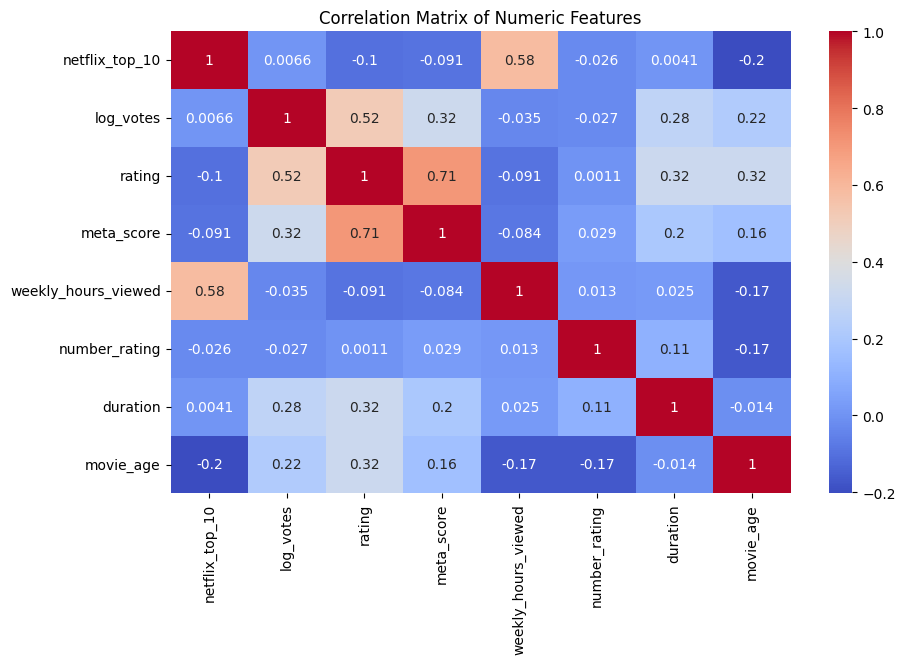

In [45]:
# Select only numeric features including the target
numeric_features = ['netflix_top_10', 'log_votes', 'rating', 'meta_score', 'weekly_hours_viewed', 'number_rating', 'duration', 'movie_age']

# Compute correlation matrix
correlation_matrix = df[numeric_features].corr()

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


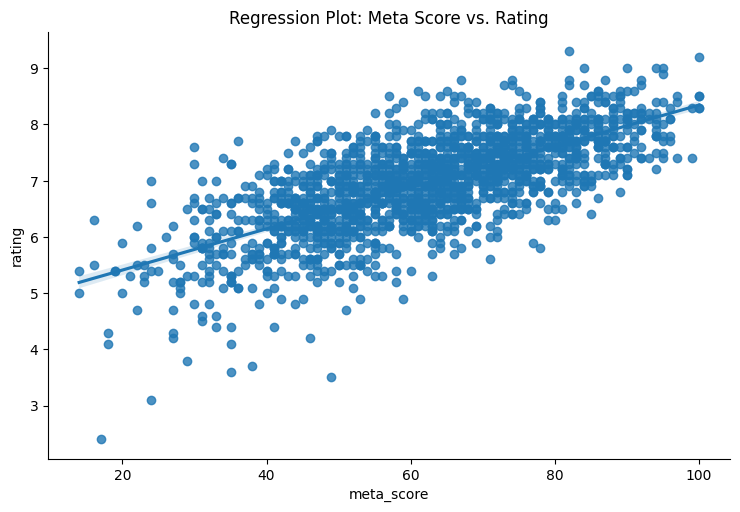

The Pearson Correlation Coefficient: 0.7058305816640229


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create regression plot with scatter points and trend line
sns.lmplot(x='meta_score', y='rating', data=df, aspect=1.5)

# Add a title to the plot
plt.title('Regression Plot: Meta Score vs. Rating')

# Show the plot
plt.show()

# Use .corr() to calculate the Pearson Correlation Coeficient bewteen those two columns
print(f"The Pearson Correlation Coefficient: {df['meta_score'].corr(df['rating'])}")

#### What does this Scatter Plot tell us?
This scatter plot shows a clear positive linear relationship between meta_score and rating, with a correlation of about 0.7. We know this by looking at the correlation matrix, which measures how closely two numerical features move together. A value of 0.7 suggests a fairly strong relationship.

We are concerned that these two features are **too similar**, which could be a problem for the model and might lead to overfitting due to multicollinearity. **Multicollinearity** happens when two or more predictor variables are highly correlated, meaning they basically provide the same information. This can make it harder for the model to figure out which variable is actually influencing the outcome.

Because of that, we need to choose one to keep and drop the other. We decided to go with the **rating** instead of the meta_score, since we feel it better reflects audience opinion and will be more helpful in predicting Netflix popularity.

### Investigate Top 10 movies Feature

In [52]:
# Check out may movies are in the Top 10 versus not (0=No, 1=Yes)
df['netflix_top_10'].value_counts()

,count
netflix_top_10,
0,1553
1,175


This shows that our data has a class imbalance, with way more movies not in the Top 10 than those that are. If we don’t address this, the logistic regression model might just predict "no" for everything and still be around 90 percent accurate. That might sound good at first, but it wouldn’t actually help us find the movies that do make it into the Top 10, which is the whole point of our model. To help address this imbalance, we will use class_weight='balanced' in our logistic regression model so it gives more importance to the smaller class.

### Train, test and scale the data

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`(won't change numerical columns, only categorical)
categorical_dummies = pd.get_dummies(df)

In [ ]:
# Split our preprocessed data into our features and target arrays
X = categorical_dummies.drop(columns="cumulative_weeks_in_top_10", axis="columns")
y = categorical_dummies["cumulative_weeks_in_top_10"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
categorical_dummies.shape[1]

876

# **Logistical Regression Model**



In [ ]:
# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")


Random Forest Mean Absolute Error: 1.08
Random Forest Root Mean Squared Error: 1.36
Random Forest R2 Score: 0.61


In [ ]:
# Save director counts to a dictionary
director_popularity = director_counts.to_dict()
director_popularity

{'Brad Furman': 19,
 'Garth JenningsChristophe Lourdelet': 18,
 'Rawson Marshall Thurber': 16,
 'Greta Gerwig': 11,
 'Gillian Armstrong': 11,
 'Shawn Levy': 10,
 'Antoine Fuqua': 10,
 'Jeff Fowler': 9,
 'Adam McKay': 8,
 'David Leitch': 7,
 'Ruben Fleischer': 7,
 'Andrew AdamsonVicky Jenson': 7,
 'Clay Kaytis': 7,
 'Jon Watts': 6,
 'Joe RussoAnthony Russo': 6,
 'Mike MitchellWalt Dohrn': 6,
 'Niki Caro': 6,
 'Jamie Payne': 5,
 'Michael Bay': 5,
 'Gil Kenan': 5,
 'Marc Forster': 5,
 'Tom Harper': 5,
 'Chris Columbus': 5,
 'Sammi Cohen': 5,
 'Grant Singer': 5,
 'Tony Scott': 5,
 'Gary TrousdaleKirk Wise': 4,
 'Hans Petter Moland': 4,
 'David Fincher': 4,
 'McG': 4,
 'Bill Condon': 4,
 'Denis Villeneuve': 4,
 'Pierre CoffinChris Renaud': 4,
 'Paul Feig': 4,
 'Scott Cooper': 4,
 'Tyler Spindel': 4,
 'Robert MarianettiRobert SmigelDavid Wachtenheim': 4,
 'Catherine Hardwicke': 4,
 'Nick BrunoTroy Quane': 4,
 'Justin Lin': 4,
 'David Yates': 4,
 'Christopher McQuarrie': 4,
 'Kenya Barris': 4

In [ ]:
# Assign each movie a numeric score based on how often the director appears in the dataset
# If a director is missing or not found, fill in the score as 0
df['director_popularity_score'] = df['director'].map(director_popularity).fillna(0)


In [ ]:
df.head()

,rating,votes,meta_score,genre0,duration,director,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,movie_age,director_popularity_score
0,8.2,654000.0,78,"Action, Drama, War",1.983,Sam Mendes,4,7,10840000,1,0,6,1
1,7.2,589000.0,69,"Action, Comedy, Crime",1.817,Phil LordChristopher Miller,4,6,11690000,1,0,13,1
2,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,5,8730000,3,1,6,5
3,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,7,7440000,2,1,6,5
4,6.1,192000.0,41,"Action, Thriller",2.133,Michael Bay,4,9,7770000,1,1,6,5


In [ ]:
# Drop columns
df = df.drop(columns=['director'])

#Check for Null Values
df.isna().sum()

,0
rating,0
votes,0
meta_score,0
genre0,0
duration,0
number_rating,0
weekly_rank,0
weekly_hours_viewed,0
cumulative_weeks_in_top_10,0
has_star_cast,0


# Keras Neural Network Model

We used a **Keras neural network** to explore whether deep learning can capture more complex patterns in the data. This model:

- Learns nonlinear relationships and deep feature interactions
- Can potentially outperform traditional models with enough data and tuning
- Requires feature scaling and hyperparameter tuning for best results
- Is highly customizable in terms of architecture and optimization

This model helps us test if complexity leads to better predictive performance, especially after comparing it with simpler methods.


In [ ]:
df.head()

,rating,votes,meta_score,duration,number_rating,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,has_star_cast,movie_age,...,has_genre_Fantasy,has_genre_Animation,has_genre_Mystery,has_genre_History,has_genre_Music,has_genre_Musical,has_genre_Romance,has_genre_Biography,has_genre_Sport,has_genre_Western
0,8.2,654000.0,78,1.983,4,7,10840000,1,0,6,...,0,0,0,0,0,0,0,0,0,0
1,7.2,589000.0,69,1.817,4,6,11690000,1,0,13,...,0,0,0,0,0,0,0,0,0,0
2,6.1,192000.0,41,2.133,4,5,8730000,3,1,6,...,0,0,0,0,0,0,0,0,0,0
3,6.1,192000.0,41,2.133,4,7,7440000,2,1,6,...,0,0,0,0,0,0,0,0,0,0
4,6.1,192000.0,41,2.133,4,9,7770000,1,1,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Used the standard 2 layers and standard neurons(64 and 32) to run a quick test
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 32

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Output layer – Removed sigmoid because we are predicting a continuous number (weeks), not a binary value (0 or 1)
nn.add(tf.keras.layers.Dense(units=1), activation='sigmoid')

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
# loss='mse' directs the model to minimize mean squared error during training
# metrics=['mae'] tracks the average prediction error (in weeks) for easier interpretation
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 13.3445 - mae: 2.5667 - val_loss: 8.1616 - val_mae: 1.8318
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.5891 - mae: 1.9004 - val_loss: 6.1331 - val_mae: 1.6005
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.3227 - mae: 1.8191 - val_loss: 5.0708 - val_mae: 1.5286
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.7453 - mae: 1.6833 - val_loss: 4.5402 - val_mae: 1.5003
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0685 - mae: 1.7343 - val_loss: 4.1899 - val_mae: 1.4524
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5150 - mae: 1.4059 - val_loss: 4.0107 - val_mae: 1.4115
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3908 - mae: 1.3499 - val_loss: 3.8520 - val_mae: 1.3895
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8831 - mae: 1.2353 - val_loss: 3.7336 - val_mae: 1.3870
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.99

In [ ]:
# Evaluate the model on test data
# MAE (Mean Absolute Error) shows how many weeks off the predictions are, on average
loss, mae = nn.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Loss (MSE): {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1666 - mae: 1.1038
Test MAE: 1.07, Loss (MSE): 2.10


In [ ]:
#Save file
nn.save('keras_model.keras')

# Keras Tuner

We used **Keras Tuner** to optimize our neural network’s architecture and hyperparameters. While our base Keras model gives us a starting point, Keras Tuner helps us:

- Automatically search for the best combination of layers, units, activations, and learning rates
- Improve model performance without manually guessing parameters
- Reduce overfitting or underfitting by finding better model configurations
- Explore multiple architectures efficiently

This step helps us fine-tune our model and potentially outperform traditional machine learning methods by leveraging the flexibility of deep learning.


In [ ]:
# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','selu'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=8,
        max_value=128,
        step=8), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=8,
            max_value=64,
            step=8),
            activation=activation))

    # Output layer for regression (no activation)
    nn.add(tf.keras.layers.Dense(units=1))

    # Compile the model
    nn.compile(loss="mse", optimizer="adam", metrics=["mae"])

    return nn

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_mae",         # Mean Absolute Error for regression
    max_epochs=20,
    hyperband_iterations=2)


In [ ]:
# Run the Keras Tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32)


Trial 60 Complete [00h 00m 09s]
val_mae: 1.3528273105621338

Best val_mae So Far: 1.1356074810028076
Total elapsed time: 00h 06m 10s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 64,
 'num_layers': 2,
 'units_0': 8,
 'units_1': 24,
 'units_2': 8,
 'units_3': 64,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0043'}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]

# Evaluate it on the test set
loss, mae = best_model.evaluate(X_test_scaled, y_test)
print(f"Best Tuned Model: Test Mean Absolute Error: {mae:.2f}")

# Save the model to a file
best_model.save('keras_tuner_best_model.keras')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7751 - mae: 1.2259 
Best Tuned Model: Test Mean Absolute Error: 1.20


# Optimized Keras Model

In [ ]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Used the standard 2 layers and standard neurons(64 and 32) to run a quick test
hidden_nodes_layer1 = 72
hidden_nodes_layer2 = 56
hidden_nodes_layer3 = 48

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer3, activation="relu"))

# Output layer – Removed sigmoid because we are predicting a continuous number (weeks), not a binary value (0 or 1)
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 72)             │         2,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 56)             │         4,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 48)             │         2,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,105 (35.57 KB)

 Trainable params: 9,105 (35.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
# loss='mse' directs the model to minimize mean squared error during training
# metrics=['mae'] tracks the average prediction error (in weeks) for easier interpretation
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 13.7331 - mae: 2.9684 - val_loss: 9.9735 - val_mae: 2.2846
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.9745 - mae: 2.4683 - val_loss: 7.2380 - val_mae: 1.7101
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.0748 - mae: 1.9297 - val_loss: 5.5498 - val_mae: 1.6121
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.9780 - mae: 1.8546 - val_loss: 4.8154 - val_mae: 1.5652
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.8138 - mae: 1.5969 - val_loss: 4.3618 - val_mae: 1.4811
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.1936 - mae: 1.6514 - val_loss: 4.0707 - val_mae: 1.4281
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9576 - mae: 1.4209 - val_loss: 3.9107 - val_mae: 1.3955
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.8200 - mae: 1.3601 - val_loss: 3.6854 - val_mae: 1.3861
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0

In [ ]:
# Evaluate the model on test data
# MAE (Mean Absolute Error) shows how many weeks off the predictions are, on average
loss, mae = nn.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Loss (MSE): {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8560 - mae: 1.1987 
Test MAE: 1.14, Loss (MSE): 2.66


### Keras Model Performance (Tuned with Keras Tuner)

- **MAE**: 1.07  
- **MSE (Loss)**: 2.01

After optimizing the architecture with Keras Tuner, our neural network performance improved significantly. The final model predicts cumulative weeks in the Top 10 with just over 1 week of average error. **While it didn't outperform Random Forest**, it proves that tuning and deep learning can still deliver strong results when the data isn't linear.
